# Análisis de señales EEG

## Introducción

¡Hola! ヽ(・ᴗ・)ﾉ para este tutorial se hará uso principalmente del lenguaje de programación Python. Este no solo nos permite interactuar con nuestros datos de manera mas versátil, sino que nos da un espacio para crear partes de código que puedan ser facilmente reproducibles en otras computadoras. Con el objetivo de asegurarnos de que el entorno sea equivalente para todos, estamos haciendo uso de [Google Colab](https://colab.research.google.com/), dado que nos permite tener una máquina virtual gratuita a nuestra disposición por medio de nuestra cuenta de google. Es importante mencionar que el sistema operativo de esta máquina virtual es Linux, el cuál es el estándar para el trabajo científico.
<br><br>
Dicho esto, el primer paso para trabajar es entender que Python trabaja de manera modular. Esto es que, por defecto, Python viene con una limitada cantidad de funciones básicas sobre las cuáles se puede construir funciones mas complejas. Como Python es un lenguaje de código abierto, hay personas geniales que crean **librerías** que empaquetan una serie de funciones. Para el tutorial de Python, primero se tienen que instalar las siguientes librerías:

| Paquete                | Descripción                                                                 |
|------------------------|-----------------------------------------------------------------------------|
| openneuro-py           | API para interactuar con datasets de OpenNeuro, permitiendo la descarga y manejo de datos BIDS. |
| mne                    | Biblioteca para el análisis de datos de EEG, MEG y otros tipos de datos para neurociencia computacional. |
| mne-bids               | Extensión de MNE para manejar datos en formato BIDS, facilitando la carga y organización de datos. |
| autoreject             | Paquete para la detección automática de artefactos en los datos de EEG mediante el algoritmo de AutoReject. |
| bids                   | Biblioteca para interactuar con el formato de datos BIDS, permitiendo la organización y manejo de datos neurocientíficos. |
| mne-icalabel           | Herramienta que integra el etiquetado automático de componentes de ICA (Independent Component Analysis) en MNE. |

A continuación, verás que para instalar estas librerías hacemos uso de un signo de exclamación "!". Esto es porque queremos indicar que necesitamos correr un determinado comando en la terminal del sistema.  

In [ ]:
# @title Instalar paquetes
%%capture
!pip install openneuro-py
!pip install mne
!pip install mne-bids
!pip install autoreject
!pip install bids
!pip install mne-icalabel

Luego de instalar las librerías, es necesario importarlas y, si es el caso, asignarles los nombres convencionales de la comunidad. A lo largo del tutorial haremos uso de estas abreviaturas para referirnos a los paquetes que hemos importado.
<br><br>
Ten en cuenta que importar es un paso esencial dado que, sin ello, Python no será capaz de ejecutar las funciones que se encuentran en dichos paquetes. A partir de aquí, nos vamos a centrar más en las funciones y el pipeline de procesaimiento de los datos, si tienes alguna consulta sobre Python te recomendamos que mires estos otros [recursos](https://github.com/neuropucp/Coding-Tutorials).

In [ ]:
# @title Importar paquetes con nombres convencionales
import matplotlib.pyplot as plt
import pandas as pd
import json
import openneuro as on
import mne
from mne_bids import BIDSPath, read_raw_bids
from bids import BIDSLayout
from autoreject import AutoReject
from mne.preprocessing import ICA
from mne_icalabel import label_components

# Procesamiento de bases de datos de EEG



## Descagar datos

¡Muy bien! Ahora que se tienen todos los módulos instalados e importados, estamos listos para analizar las bases de datos de EEG 🧠 ง
<br><br>
El primer paso puede sonar bastante obvio: conseguir los datos a analizar. Lo cual seguramente nos lleva a la siguiente pregunta.
<br><br>
¿Dónde se pueden conseguir datos de EEG para practicar los análisis o participar en nuevos descubrimientos científicos?
<br><br>
¡Fácil! Hoy en día, hay muchas plataformas que ayudan compartiendo datos para hacer la ciencia más abierta y acelerar los descubrimientos. En este caso, utilizaremos [OpenNeuro](https://openneuro.org/), una plataforma con datos de EEG, iEGG, MRI, etc.
<br><br>
Además de tener la opción de buscar dentro de la plataforma misma, también podemos encontrar papers cuyas bases de datos están dentro de Open Neuro. En este caso, utilizaremos la base de datos que se utilizó en el paper "[Single-trial visually evoked potentials predict both individual choice and market outcomes](https://www.nature.com/articles/s41598-023-41613-4)", cuya base de datos se encuentra disponible [aquí](https://openneuro.org/datasets/ds004284/versions/1.0.0).



Para comenzar a obtener los archivos, primero tenemos que crear un directorio en esta máquina virtual para contenerlos. Esto lo haremos ejecutando !mkdir o "make directory", un comando de Linux reconocido por colab.

In [ ]:
# @title Crear carpeta para los datos
!mkdir data

mkdir: cannot create directory ‘data’: File exists


Una de las librerías que instalamos e importamos es la de OpenNeuro ([esta librería](https://github.com/hoechenberger/openneuro-py) la hemos importado con el nombre 'on'). En este caso, utilizaremos el método "download" con los parámetros "dataset" para señalar la base de datos a descargar, "target_dir" para señalar en qué directorio se quiere almacenar y "include" para filtrar a que sólo un participante se descargue.
<br><br>
Es importante resaltar que el nombre del dataset corresponde al **OpenNeuro Accession Number**, que es un código de identificación de la base que puede ser encontrada en la misma página web donde descansan los [datos](https://openneuro.org/datasets/ds004284/versions/1.0.0)
<br><br>
Si se obvia el parámetro include, la librería Open Neuro descargará toda la base de datos; sin embargo, esto causaría que la máquina virtual de Google se reseteara, ya que es mucha información.

In [ ]:
# @title El API de open neuro para descargar la base de datos
on.download(
    dataset="ds004284",  # OpenNeuro Accession Number
    target_dir="/content/data",  # Carpeta donde se guardará el dataset
    include=["sub-104/"],  # Solo incluir los participantes sub-104
)


👋 Hello! This is openneuro-py 2024.2.0. Great to see you! 🤗

   👉 Please report problems 🤯 and bugs 🪲 at
      https://github.com/hoechenberger/openneuro-py/issues

🌍 Preparing to download ds004284 …


📁 Traversing directories for ds004284 : 0 entities [00:00, ? entities/s]

📥 Retrieving up to 14 files (5 concurrent downloads). 
✅ Finished downloading ds004284.
 
🧠 Please enjoy your brains.
 


In [ ]:
# @title Esto nos ayuda a refrescar el directorio luego de la descarga
!ls /content/data

CHANGES  dataset_description.json  participants.json  participants.tsv	README	sub-104


Como se puede ver, ahora tenemos una serie de archivos en la carpeta data que hemos creado. Estos archivos representan a nuestros datos y nos dan una idea del experimento realizado.

## Brain Imaging Data Structure (BIDS)

Luego de descargada la base de datos, el paso siguiente es explorarla.
<br><br>
Para esto, sabemos que la mayoría de base de datos de Open Neuro se encuentran en formato [BIDS](https://bids-specification.readthedocs.io/en/stable/) (Brain Imaging Data Structure), el cual ofrece una convención de organización para los datos que son compartidos en la investigación de neurociencias. A continuación, podemos ver una imagen que resumen esta organización:

<figure>
  <img src="https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41597-019-0104-8/MediaObjects/41597_2019_104_Fig1_HTML.png" alt="Dataset EEG-BIDS" width="600">
  <figcaption>
    [Ejemplo de conjunto de datos de EEG-BIDS con vistas previas de archivos EEG. De: <a href="https://doi.org/10.1038/s41597-019-0104-8" target="_blank">EEG-BIDS, an extension to the brain imaging data structure for electroencephalography</a>]
    <br><br>
    Los números en la imagen representan lo siguiente:
    <ul>
      <li>(1) Datos EEG sin procesar.</li>
      <li>(2) Metadatos asociados.</li>
      <li>(3) Eventos que pueden ser referenciados a los estímulos de la carpeta de estímulos de la base de datos.</li>
      <li>(4) Un archivo en formato TSV que contiene los datos de los canales y los filtros.</li>
      <li>(5) Un archivo en formato TSV que contiene la información de los electrodos.</li>
      <li>(6) Un archivo "json" que proporciona la ubicación de los electrodos.</li>
    </ul>
  </figcaption>
</figure>


<br><br>
Gracias a esta convención, podemos tener una idea de la estructura del archivo que vamos a descargar y, para hacer las cosas fáciles ¡Podemos utilizar la librería del BIDS en Python para leer la estructura de los archivos por nosotros (⊙ ⊙)ノ [BIDS Python](https://bids-standard.github.io/pybids/api.htm)！
<br><br>
Esto nos ayudará a extraer la información que es relevante para nosotros, sin necesidad de explorar cada carpeta y archivo. De toda la librería del BIDS, hemos importado sólo BIDSLayout que nos dará la estructura de la base datos.

In [ ]:
# @title Descripción de la base
layout = BIDSLayout(
    "/content/data"
)  # guarda la estructura de las carpetas y contenidos en la variable layout
subjects = (
    layout.get_subjects()
)  # de la variable layout, extraemos los nombres que por organización deberían corresponder a los sujetos.
tasks = layout.get_tasks()  # de la variable layout, extraemos los nombres de las tasks.
datatypes = layout.get_datatypes()  # de la variable layout, extraemos los datatypes.
files = (
    layout.get_files()
)  # de la variable layout, extraemos los nombres de los archivos.

print(layout)
print("Subjects:", subjects)
print("Tasks:", tasks)
print("Data types:", datatypes)
print("Files:", files)
layout.get_dataset_description()

BIDS Layout: .../content/data | Subjects: 1 | Sessions: 0 | Runs: 0
Subjects: ['104']
Tasks: ['kickstarter']
Data types: ['eeg']
Files: {'/content/data/participants.json': <BIDSJSONFile filename='/content/data/participants.json'>, '/content/data/README': <BIDSFile filename='/content/data/README'>, '/content/data/dataset_description.json': <BIDSJSONFile filename='/content/data/dataset_description.json'>, '/content/data/CHANGES': <BIDSFile filename='/content/data/CHANGES'>, '/content/data/participants.tsv': <BIDSDataFile filename='/content/data/participants.tsv'>, '/content/data/sub-104/sub-104_scans.tsv': <BIDSDataFile filename='/content/data/sub-104/sub-104_scans.tsv'>, '/content/data/sub-104/eeg/sub-104_electrodes.tsv': <BIDSDataFile filename='/content/data/sub-104/eeg/sub-104_electrodes.tsv'>, '/content/data/sub-104/eeg/sub-104_task-kickstarter_eeg.eeg': <BIDSFile filename='/content/data/sub-104/eeg/sub-104_task-kickstarter_eeg.eeg'>, '/content/data/sub-104/eeg/sub-104_coordsystem.js

{'Name': 'eeg-neuroforecasting',
 'BIDSVersion': '1.6.0',
 'DatasetType': 'raw',
 'Authors': ['Veillette, J.', 'Heald, S.', 'Wittenbrink, B.', 'Nusbaum, H.'],
 'License': 'CC0',
 'ReferencesAndLinks': ['https://github.com/john-veillette/eeg-neuroforecasting'],
 'DatasetDOI': 'doi:10.18112/openneuro.ds004284.v1.0.0'}

Como se esperaba, tenemos una estructura de un solo participante etiquetado bajo el código 104. Además, solo se ha recogidos datos de EEG con la tarea de kickstarter. Cabe mencionar que no hay sesiones o runs porque todos los datos se recogieron en un solo momento por participante.
<br><br>
El nombre del experimento es **eeg-neuroforecasting** y fue diseñada por Veillete et al. Asimismo, tenemos un link a la base de datos y al github del autor principal.



## Cargamos los datos con MNE

Ahora que tenemos la estructura de nuestros datos, podemos pasar a cargarlos a MNE para empezar con el preprocesamiento. Para ello, haremos uso de la función [BIDSPath](https://mne.tools/mne-bids/stable/generated/mne_bids.BIDSPath.html) y definiremos la ruta de acceso, el participante con el que vamos a trabajar, la tarea y el tipo de datos empleados.
<br><br>
Ojo. Si bien estamos en una base simple con un solo participante, es importante acostumbrarnos a colocar esta información dado que en experimentos de mayor complejidad podemos tener registros de distintos tipos así como tareas diversas.
<br><br>
Luego de especificar la ruta del participante, cargaremos los datos a MNE con la función ["read_raw_bids"](https://mne.tools/mne-bids/stable/generated/mne_bids.read_raw_bids.html). Es importante mencionar que indicamos "verbose=False" porque no queremos un output sobrecargado del proceso de lectura de los datos y que especificamos el parámetro adicional "'preload': True" dado que queremos que la base esté disponible en la memoria RAM. Esto último nos sirve para que los análisis sean más rápidos aunque puede sobrecargarse si cargamos demasiados datos a la vez.

In [ ]:
# @title Leer los datos de Open Neuro (Organizados en formato BIDS) con MNE
# Define BIDS path
bids_path = BIDSPath(
    root="/content/data",  # especificamos la ruta del archivo
    subject=subjects[
        0
    ],  # señalamos que solo se quiere recuperar el primer elemento de la lista de sujetos.
    task="kickstarter",  # señalamos el task que se quiere recuperar en la base de datos. Esto es necesario porque en una base de datos BIDS puedes tener varias tasks.
    datatype="eeg",  # señalamos el tipo de datos que se quiere recuperar. Esto también es necesario porque en BIDS se pueden guardar distintas señales si el estudio ha utilizado varias medidas comportamentales.
)

# Load raw data
raw = read_raw_bids(  # función básica de MNE para leer datos sin procesar en formato BIDS.
    bids_path,  # la variable que hemos definido antes que tiene toda la información de cómo recuperar el archivo. Básicamente, la función anterior requiere que le respondan a la pregunta "¿Dónde está?"
    verbose=False,
    extra_params={"preload": True},  # se cargan los datos a la memoria RAN.
)

raw.info

<Info | 12 non-empty values
 bads: []
 ch_names: E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12, E13, E14, ...
 chs: 129 EEG
 custom_ref_applied: False
 description: Anonymized using a time shift to preserve age at acquisition
 dig: 132 items (3 Cardinal, 129 EEG)
 experimenter: mne_anonymize
 highpass: 0.0 Hz
 line_freq: 60.0
 lowpass: 500.0 Hz
 meas_date: 1924-12-31 22:41:33 UTC
 nchan: 129
 projs: []
 sfreq: 1000.0 Hz
 subject_info: 3 items (dict)
>

Finalmente, hemos solicitado información sobre el archivo "raw" de nuestra base. Aquí podemos observar la frecuencia de sampleado, los filtros de la data, la cantidad de canales (buenos) de EEG, etc.

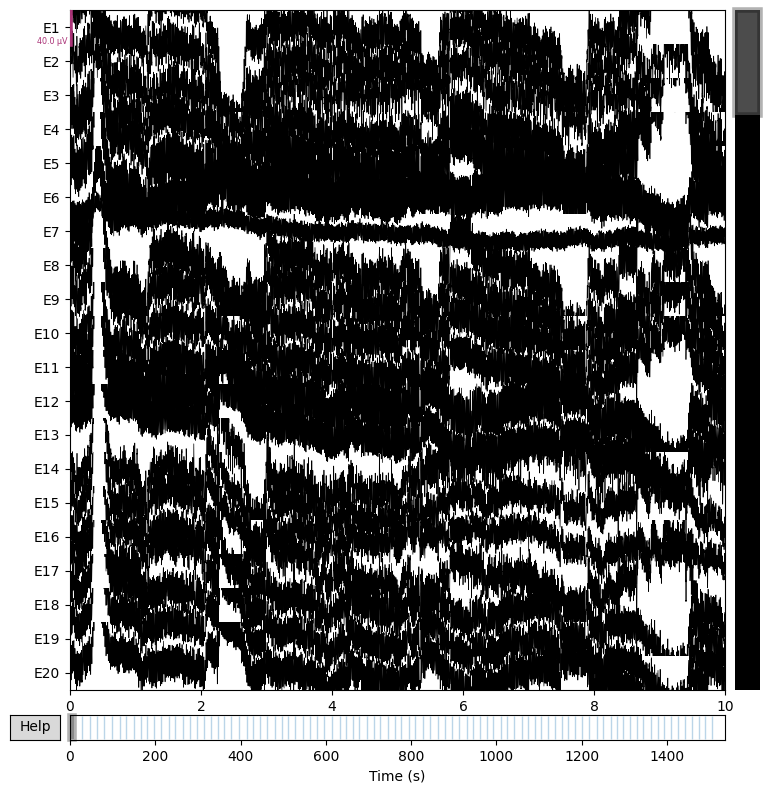

In [ ]:
# @title Visualizar la señal sin procesar con Raw.plot()
raw_plot = raw.plot(show=False)
# usamos show=False y asignamos a una variable por un defecto del colab

Podemos generar una imagen interactiva de los datos. No obstante, dado que estamos en una maquina virtual de google colab, no contamos con las librerías suficientes para generar este gráfico en una ventana aparte. No obstante, este gráfico nos permite tener una mirada rápida a la estructura de serie de tiempo de nuestros datos, colocando los canales en el eje Y y en el eje X, el tiempo en segundos.
<br><br>
Una mirada rápida a los datos con [raw.plot()](https://mne.tools/stable/auto_tutorials/raw/40_visualize_raw.html) nos muestra la cantidad de ruido que se tiene y, con ello, la necesidad de preprocesar estos datos previo a cualquier análisis relevante.

## Preprocessing workflow

Antes de poder entrar de lleno al flujo de preprocesamiento de los datos, es importante considerar algunas cuestiones.
<br><br>
En primer lugar, el preprocesamiento no es una tarea sencilla. Basta con hacer una simple búsqueda en internet para notar que existen muchas técnicas y criterios que se pueden emplear para el análisis de estos datos. De hecho, los datos de EEG no solo son complejos, sino que, en su medición, pueden ser susceptibles a distintos factores fuera de nuestro control que pueden alterar el registro. Entre estos factores se incluyen, por ejemplo, el movimiento muscular (o ocular), el uso de dispositivos electrónicos cercanos e incluso un simple pestañeo, los cuales pueden generar ruido en la señal. Más aún, aunque el método presentado en este tutorial busca ser automático, [hay trabajos que discuten el uso de estas técnicas](https://doi.org/10.1038/s41598-023-27528-0), defendiendo un enfoque primordialmente manual.
<br><br>
Entonces, ¿qué hacer? Lejos de desesperarnos, sugerimos que este tutorial se enfoque desde la siguiente perspectiva:
<br><br>
1. Como una guía inicial de procesamiento que puede ser modificada según el objetivo de investigación o análisis que deseen realizar.
2. Como una aproximación a la complicada tarea del preprocesamiento, que intenta presentar de manera clara y concisa los pasos que, según la literatura, se han considerado fundamentales a la hora de evaluar la calidad de los datos de EEG para su análisis.
<br><br>

A continuación, se puede observar una imagen que resume el flujo del preprocesamiento de los datos de EEG. En las siguiente secciones se presentará cada uno de estos pasos con el código necesario para ejecutarlo en nuestra data de ejemplo.



#### **Pasos del Preprocesamiento**

<figure style="text-align:left; margin: 1.25rem 0;background:#fff;">
  <img src="https://raw.githubusercontent.com/neuropucp/lab-book/refs/heads/main/res/eeg_workflow.png"
       alt="vol"
       style="display:block; margin:0 auto; max-width:50%; width:600px; height:auto;">
  <figcaption style="margin-top:.5rem; color:#555;">Flujo con copia de entrenamiento.</figcaption>
</figure>

### High pass filtering and line noise removal

Un filtro modifica selectivamente una señal, atenuando o enfatizando algunos de sus componentes. Específicamente, el filtrado permite aislar una banda de frecuencia de interés y, mediante ello, remover la presencia de artefactos en la señal. Previamente, mencionamos cuán susceptible es una señal de este tipo al ruido proveniente del ambiente o del propio participante. Estos "ruidos" se denominan formalmente artefactos, y la meta principal del preprocesamiento es minimizar o eliminar su presencia en la señal.
<br><br>
Para comprender mejor cómo los filtros actúan sobre las frecuencias de onda, es útil recordar que una frecuencia (medida en Hertzios, Hz) representa la cantidad de ciclos o repeticiones de un suceso por segundo. Por ejemplo, una frecuencia de 70 Hz indica que un suceso se repite 70 veces por segundo.
<br><br>
En el contexto de señales EEG, estas repeticiones están relacionadas con las oscilaciones de los microvoltios (µV) a lo largo del tiempo. Para más información sobre cómo las frecuencias están presentes en señales EEG, puedes consultar los siguientes [gráficos](https://www.researchgate.net/publication/327019936_Predicting_Sleepiness_from_Driving_Behaviour) de un artículo científico.
<br><br>
¿Qué significa que los filtros "limpien" frecuencias?
<br><br>
En términos simples, el filtrado permite eliminar componentes de frecuencia que no son de interés (como el ruido de corriente eléctrica a 50 o 60 Hz) sin comprometer los datos importantes en teoría.
<br><br>
El filtrado es especialmente útil para eliminar:
<br><br>
1. Slow drift: Oscilaciones de baja frecuencia (< 0.5 Hz) causadas por movimientos del participante o del equipo de medición.
2. Power line noise: Ruido generado por la corriente eléctrica, típicamente entre 50 y 60 Hz dependiendo de la frecuencia de la red eléctrica local.
<br><br>

Tipos de filtros recomendados
<br><br>
1. High-pass filter (filtro pasa-altos): Este filtro permite el paso de frecuencias altas y atenúa las frecuencias bajas. Por ejemplo, un filtro pasa-altos con un límite de 1 Hz se recomienda antes de realizar un análisis ICA, ya que elimina componentes lentos como el slow drift. En este caso, además, tendremos un low-pass filter (filtro pasa-bajos) de 100 Hz dado que estamos interesados en usar la función de [ICALabel](https://mne.tools/mne-icalabel/stable/generated/examples/00_iclabel.html#sphx-glr-generated-examples-00-iclabel-py) mas adelante.

2. Notch filter (filtro de rechazo de banda): Este filtro atenúa una frecuencia específica. En el caso del ruido de corriente eléctrica, se recomienda usar un notch filter de 60 Hz (o 50 Hz, según la frecuencia de la red eléctrica del lugar).
<br><br>

Consideraciones clave
<br><br>
1. La frecuencia específica para el notch filter depende del sistema eléctrico de la región donde se realizó la grabación.
2. Estos pasos de filtrado son fundamentales para asegurar una señal EEG más limpia y apta para análisis avanzados como ICA.

In [ ]:
# @title Filtrados de Bandpass
raw.filter(
    l_freq=1,  # filtraremos para que solo los datos arriba de esta frecuencia sean relevantes.
    h_freq=100,  # esta es la frecuencia límite. Sólo los datos hasta esta frecuencia serán incluidos.
)
raw.notch_filter(
    freqs=60  # eliminamos esta frecuencia, la cual es comúnmente de corriente eléctrica.
)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 3301 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    3.7s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    5.1s


<RawBrainVision | sub-104_task-kickstarter_eeg.eeg, 129 x 1536422 (1536.4 s), ~1.48 GB, data loaded>

### Re-referencing and event epoching

El EEG mide el voltaje (diferencia de potencial eléctrico) que resulta de la resta entre un electrodo y el electrodo de referencia. Dicho de otro modo, lo que se defina como referencia será sustraído de todos los electrodos del EEG, lo que puede variar drásticamente la señal dependiendo del punto de referencia seleccionado.
<br><br>
Un electrodo de referencia ideal sería aquel que no registre actividad cerebral, pero que capture todo el ruido ambiental. De esta manera, al ser sustraído del resto de los electrodos, dejaría como resultado únicamente la actividad cerebral.
<br><br>
Los lugares más comunes para colocar este electrodo son el lóbulo de la oreja o los mastoides. Sin embargo, el punto de referencia ideal sigue siendo un tema de debate en la literatura actual. Por ello, una estrategia aceptada, aunque no exenta de críticas, es utilizar el promedio de la señal de todos los electrodos como referencia.

In [ ]:
# @title Referenciando al promedio
raw.set_eeg_reference(ref_channels="average")

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


<RawBrainVision | sub-104_task-kickstarter_eeg.eeg, 129 x 1536422 (1536.4 s), ~1.48 GB, data loaded>

Al generar un gráfico de nuestras series de tiempo, vemos que nuestra señal ha mejorado caramente. Sin embargo, aún podemos notar ciertos picos o caídas muy abruptos.

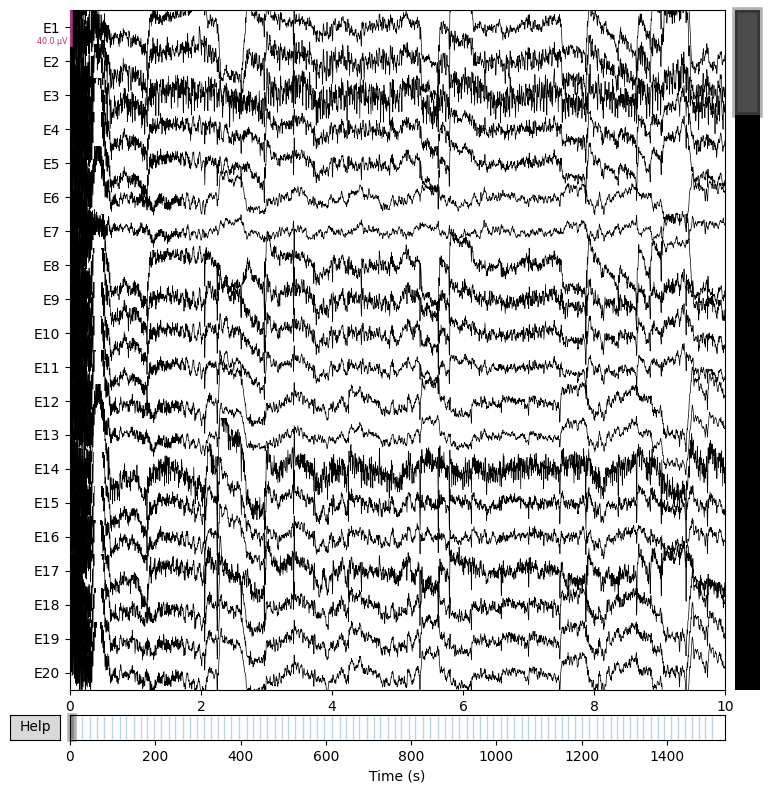

In [ ]:
raw_ref_plot = raw.plot(show=False)

# Eventos del experimento

Dado que nuestra data es primordialmente experimental, es necesario que podamos vincular las series de tiempo a los momentos en donde se presentaron los distintos estímulos o tareas experimentales. Así, los **eventos** son marcadores de tiempo que registran la aparición o cese de los estímulos. Por su parte, "epoch" (o epojé) es el nombre que recibe un segmento específico de la data. Dado que lo que nos interesa en este caso es cómo cambia la señal a partir de un evento experimental, podemos segmentar la data (crear epochs) alrededor de cada evento; este enfoque de análisis podría ser denominado dentro de la jerga EEGiana como el intentar encontrar el "potencial relacionado a eventos" (o Event Related Potential).
<br><br>
¡Bueno! ¿Pero cómo hacemos para obtener información acerca de cuándo ocurrieron los eventos experimentales?
<br><br>
En este caso particular, los eventos se pueden encontrar como anotaciones dentro de los datos crudos. Para obtenerlos, usaremos un comando de MNE para transformar en esas anotaciones (y las marcas en el tiempo) a un numpy array (estructura de datos).

In [ ]:
# @title Transformamos las anotaciones de raw a eventos
events, events_id = mne.events_from_annotations(raw)

print(events)
print(events.shape)

Used Annotations descriptions: ['image']
[[  28283       0   10001]
 [  46266       0   10001]
 [  64249       0   10001]
 [  80266       0   10001]
 [  98266       0   10001]
 [ 116266       0   10001]
 [ 132249       0   10001]
 [ 150266       0   10001]
 [ 166266       0   10001]
 [ 181266       0   10001]
 [ 196266       0   10001]
 [ 214266       0   10001]
 [ 232266       0   10001]
 [ 247233       0   10001]
 [ 265250       0   10001]
 [ 281250       0   10001]
 [ 297250       0   10001]
 [ 315250       0   10001]
 [ 331250       0   10001]
 [ 346250       0   10001]
 [ 362250       0   10001]
 [ 378250       0   10001]
 [ 396250       0   10001]
 [ 414250       0   10001]
 [ 430250       0   10001]
 [ 445233       0   10001]
 [ 463234       0   10001]
 [ 481234       0   10001]
 [ 497234       0   10001]
 [ 512234       0   10001]
 [ 528217       0   10001]
 [ 546234       0   10001]
 [ 562234       0   10001]
 [ 578234       0   10001]
 [ 596234       0   10001]
 [ 614234     

El primer valor en esta lista de eventos es la marca en el tiempo. El valor de en medio en la práctica siempre es 0, pero está hecho para identificar el evento inmediatamente anterior (cuando hay eventos que se superponen). El último valor es el código del evento. En este caso vemos que todos los eventos tienen el mismo código que según la descripción significa "imagen", pero si juntamos la metadata veremos que el contenido de dicha "imagen" puede ser distinto.

In [ ]:
events_fpath = layout.get(
    scope="raw", subject="104", suffix="events", extension="tsv", return_type="filename"
)[0]

events_df = pd.read_csv(events_fpath, sep="\t")
events_df

onset  duration   sample  funded  choice category project_id trial_type
0     28.283         0    28283       1     0.0    place       PR81      image
1     46.266         0    46266       0     0.0    place       PR59      image
2     64.249         0    64249       1     0.0     face       PR11      image
3     80.266         0    80266       1     NaN    place       PR78      image
4     98.266         0    98266       1     0.0    place       PR63      image
..       ...       ...      ...     ...     ...      ...        ...        ...
86  1443.170         0  1443170       1     0.0     face       PR02      image
87  1459.170         0  1459170       1     0.0     face       PR31      image
88  1475.170         0  1475170       0     0.0    place       PR88      image
89  1490.170         0  1490170       1     0.0     face       PR21      image
90  1505.170         0  1505170       0     0.0    place       PR50      image

[91 rows x 8 columns]

Esta información será útil a la hora de crear epochs:


*   Sabemos en qué tiempo se presentaron los eventos (imágenes). Esto es crucial para crear segmentos alrededor de los eventos experimentales.
*   Sabemos características más exactas de esos eventos (si fueron lugares, productos, etc).



Ahora, podemos generar un gráfico de las series tiempo con las marcas de evento. Si se observa la parte superior del gráfico se podrá ver en celeste la marca del eveto.

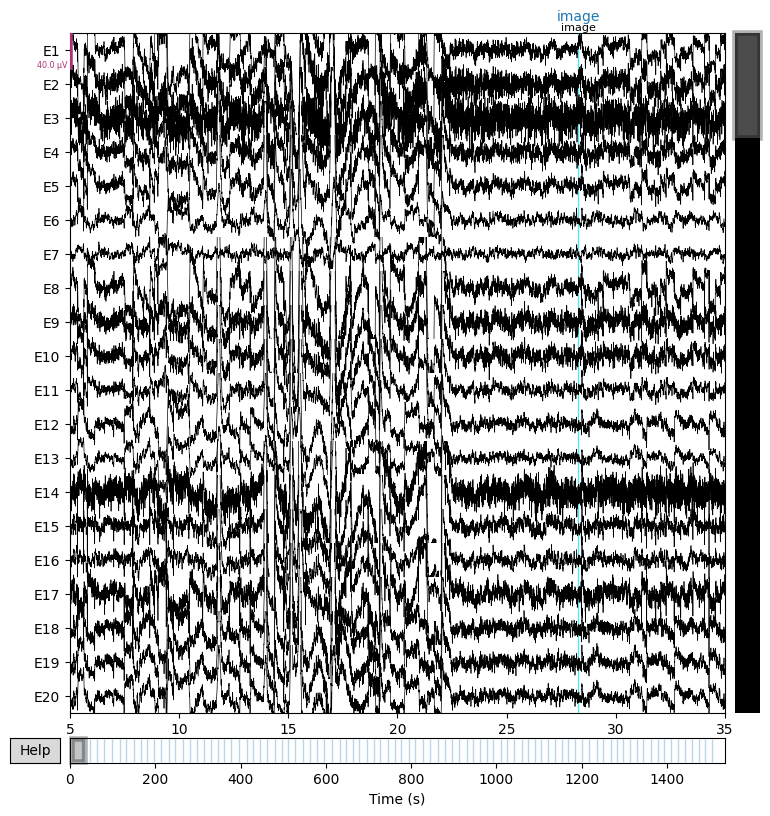

In [ ]:
raw_plot_events = raw.plot(
    start=5, duration=30, events=events, event_id=events_id, show=False
)

Ahora que tenemos los eventos, podemos definir los epochs con los que deseamos trabajar.
<br><br>
Nota: si bien hemos cargado a la memoria RAM el resultado de este epoco, esto se ha hecho principalmente para agilizar el análisis. En la presencia de muchos participantes, esto podría entorpecer el comportamiento de la computadora.

# Crear Epochs

Como se mencionó antes, las epochs son segmentos de la data. Entonces, se harán segmentos alrededor de cada evento. (・ᴗ・)っ✂

In [ ]:
# @title Epochs
epochs = mne.Epochs(
    raw,  # Nuestra data raw filtrada y referenciada
    events,  # Los eventos del experimento. En este caso todavía no contienen la metadata.
    tmin=-0.2,  # Los epochs iniciaran 200 ms antes del evento
    tmax=0.8,  # Los epochs finalizarán 800 ms después del evento
    preload=True,  # Los epochs se han cargado en la memoria RAM
    baseline=None,  # No aplicamos baseline por ICALabel
)

Not setting metadata
91 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 91 events and 1001 original time points ...
0 bad epochs dropped


Segmentada la data, podemos agregar los datos de la metadata de los eventos a cada epoch.

In [ ]:
epochs.metadata = events_df

Adding metadata with 8 columns


Un gráfico de los epochs, nos permite ver la data segmentada apropiadamente. Asimismo, denota la presencia de cambios abruptos en la señal, producto de artefactos como el pestañeo que es necesario elimiar en nuestro siguiente paso.



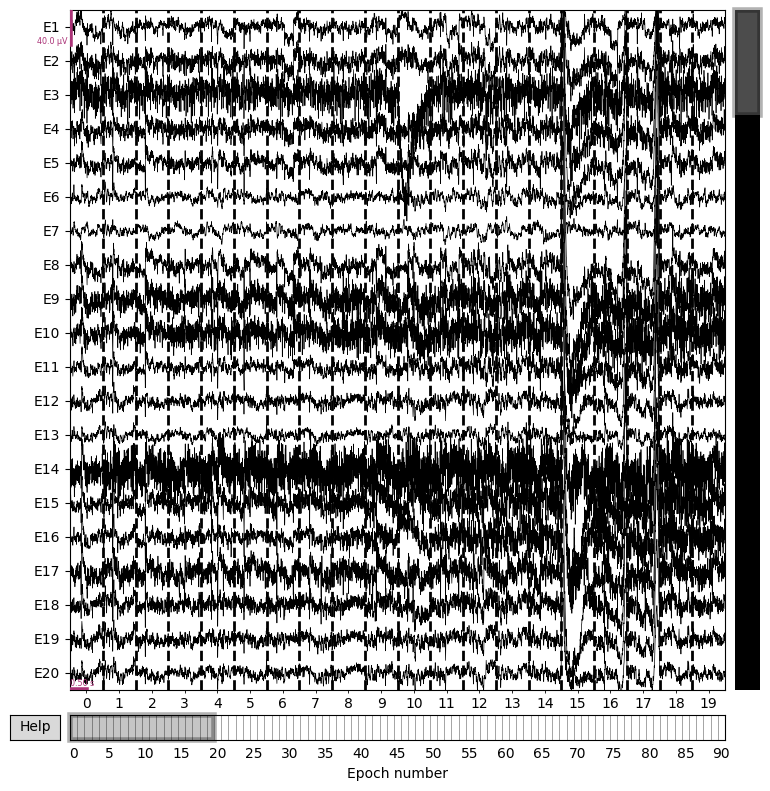

In [ ]:
epochs_plot = epochs.plot(show=False)

### Autoreject

Autoreject es un algoritmo que se presenta como una solución automatizada para rechazar malos trials y reparar la señal de los sensores con interpolación.
<br><br>
La interpolación es el proceso por el cuál se estima un valor que se encuentra fallado o dañado, haciendo uso de datos cercanos. Es algo parecido a cuando hay valores en blanco de una prueba cuantitativa y se busca reemplazarlos en base a los patrones encontrados en otras pruebas... Bueno ... ¡En realidad la idea es la misma pero el proceso mucho más complejo! ･(>﹏<)
<br><br>
Autoreject es un algoritmo automatizado de procesamiento de señales que busca minimizar el error, escogiendo las soluciones que dan mejores resultados entre una serie de opciones. En otras palabras, selecciona parámetros óptimos para corregir la señal.
<br><br>
Para más información, se puede revisar la [página web del paquete](https://autoreject.github.io/stable/index.html).
<br><br>


In [ ]:
# @title Flujo de rechazo automático
# crea el modelo de rechazo
ar = AutoReject(
    n_interpolate=[1, 2, 3, 4],  # hasta 4 canales de referencia para interpolar
    random_state=11,
    n_jobs=1,  # número de núcleos del procesador a utilizar para procesamiento simultáneo. La máquina virtual tiene 1.
    verbose=True,
)
# ajusta el modelo a los epochs para aprender e identificar artefactos
ar.fit(epochs[:20])
# aplica el modelo y devuelve tantos los epochs limpios como rechazados
epochs_ar, reject_log = ar.transform(
    epochs, return_log=True  # elegimos qué epochs transformar
)
# actualiza las epochs con las nuevas epochs reparadas y filtradas
epochs = epochs_ar

# epochs = epochs[~reject_log.bad_epochs] #si solo se quieren filtrar las epochs rechazadas y no utilizar las mejoradas.

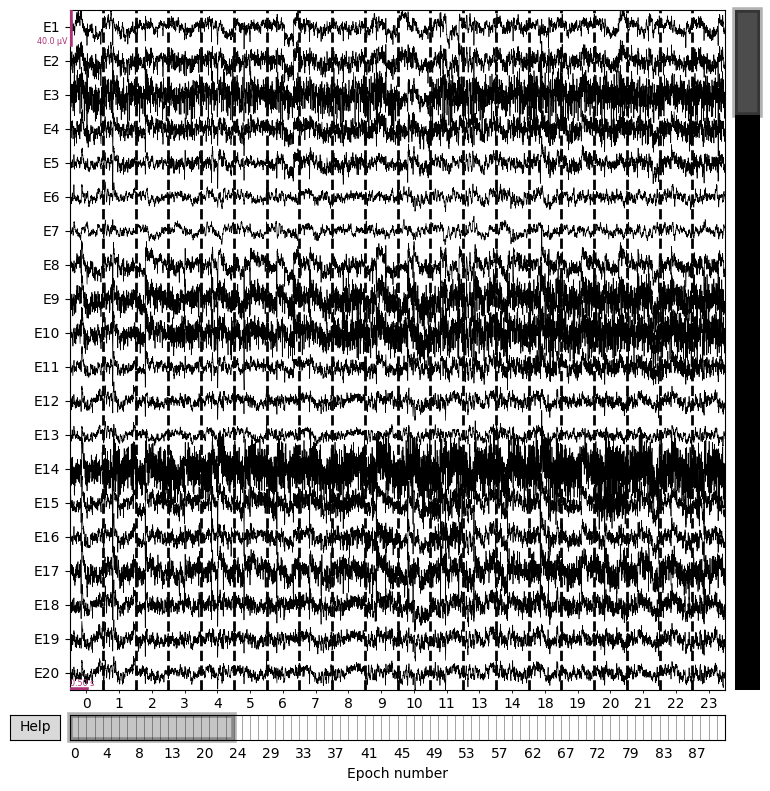

In [ ]:
# epochs reparadas
epochs_reject = epochs.plot(show=False)

El gráfico de nuestros epochs actualizado, nos permite observar una data considerablemente más limpia. Ahora, solo nos falta un paso más para concluir con el preprocesamiento.

### Independent Component Analysis (ICA)

Mientras que AutoReject se encarga de identificar y descartar los datos corruptos o con artefactos, ICA (Análisis de Componentes Independientes) separa las señales de acuerdo con sus fuentes, permitiendo eliminar aquellas que provienen de artefactos.
<br><br>
Una forma útil de entender cómo funciona ICA es imaginar una sala de grabación en la que se está tocando una banda. En esa sala, se usan varios micrófonos para grabar cada instrumento por separado. Esta analogía se asemeja bastante al funcionamiento del EEG. Los electrodos son nuestros micrófonos, y la actividad cerebral que medimos sería el sonido que grabamos. Ahora, imagina que queremos separar el sonido de la guitarra de los demás instrumentos. ¿Es posible? La respuesta es sí. Usando un análisis de componentes independientes, podemos separar la grabación en diferentes pistas, cada una correspondiente a un instrumento, para poder mezclarlas de nuevo más tarde. Así, podríamos obtener una pista solo con la guitarra.
<br><br>
Aunque esto es relativamente sencillo en el contexto de la grabación de música, con la actividad cerebral tenemos el desafío de no saber cuántas son las fuentes que generan esa actividad. Por esta razón, limitamos la cantidad de "instrumentos" a la cantidad de "micrófonos" (electrodos) que tenemos. Sin embargo, gracias a herramientas como [ICAlabel](https://mne.tools/mne-icalabel/stable/index.html), podemos intentar etiquetar las fuentes de la actividad, como "movimiento muscular", "movimiento ocular", "actividad cerebral", "otros", etc.
<br><br>
Finalmente, podemos rechazar todas las fuentes que no provengan de la actividad cerebral o "otros", reconstruyendo la señal adecuadamente.
<br><br>
Es importante notar que para realizar este análisis se realizaron los epochs con baseline=None y se ejecutó previamente un high-pass filter the 1 Hz y un low-pass filter de 100 Hz, de acuerdo a las recomendaciones del paquete.

In [ ]:
# Se crea un objeto ICA
ica = ICA(
    max_iter="auto",  # El n máximo de iteraciones será automático
    method="infomax",  # El método usado para el ICA será 'infomax' (icalabel)
    random_state=99,  # Establecemos una semilla aleatoria
    fit_params=dict(extended=True),  # Mejora la calidad de los componentes.
)

# Se ajusta el modelo ICA
ica.fit(epochs)

# Etiquetado de los componentes ICA utilizando el método ICLabel
ic_labels = label_components(epochs, ica, method="iclabel")

# Extraemos las etiquetas de los componentes ICA.
labels = ic_labels["labels"]

# Listado de los componentes que no sean cerebrales u 'otros' para excluirlos.
exclude_idx = [
    idx for idx, label in enumerate(labels) if label not in ["brain", "other"]
]

# Si no se encuentran componentes ICA para excluir, se imprime un mensaje.
if not exclude_idx:
    print("No ICA components found to exclude.")

# Si se encuentran componentes, se imprime la lista de índices a excluir.
else:
    print(f"Excluding these ICA components: {exclude_idx}")

    # Se aplica el filtro ICA a los datos epocalizados.
    ica.apply(epochs, exclude=exclude_idx)

Fitting ICA to data using 129 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 129 components
Computing Extended Infomax ICA
Fitting ICA took 245.1s.
Excluding these ICA components: [3, 8, 12, 15, 18, 20, 21, 48, 52, 56, 60, 65, 70, 71, 77, 83, 86, 92, 101, 115, 126]
Applying ICA to Epochs instance
    Transforming to ICA space (129 components)
    Zeroing out 21 ICA components
    Projecting back using 129 PCA components


Con la exclusión de 29 componentes, se puede ahora reconstruir la data con una frecuencia mas limpia y lista para posteriores análisis.

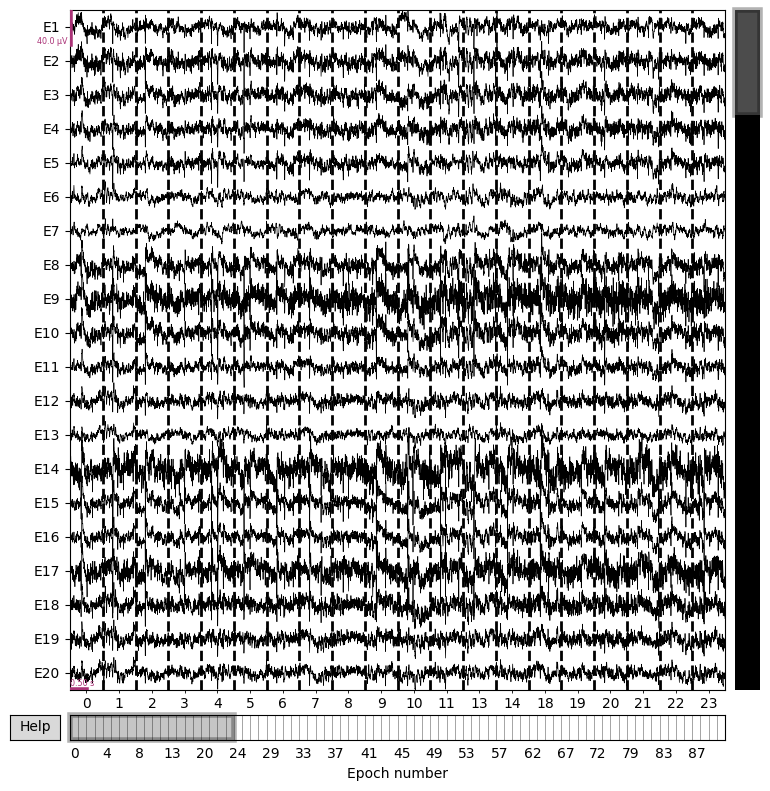

In [ ]:
epochs_ica = epochs.plot(show=False)

# Examinar Epochs y Evokeds relacionados a eventos.
Luego de haber pre-procesado los datos para limpiarlos de artefactos y ruidos, podemos trabajar con los segmentos que hemos hecho alrededor de los eventos (epochs). Lo primero que se puede realizar es tener una visión de los epochs a través del segmento de tiempo en el que hemos creado las epochs.

Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated
combining channels using GFP (eeg channels)


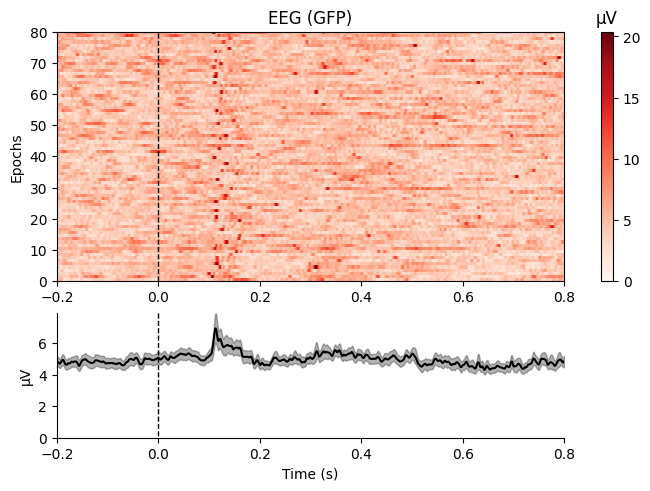

[<Figure size 640x480 with 3 Axes>]

In [ ]:
epochs.plot_image()

¡Bien! Ahora... ¿Qué es ese gráfico extraño de colores 「(°ヘ°)?
<br><br>
Bueno, se puede explicar empezando por lo más familiar, los ejes X e Y. En el eje X tenemos el tiempo que duran las epochs (los segmentos que hemos cortado), este va de -0.2 a 0.8. En el eje Y se tienen las epochs individuales, enumeradas del 0 al 80. Dentro del gráfico podemos ver los colores, que significan la intensidad que tuvo el voltaje (microvoltios) en un momento determinado (eje X) en una epoch determinada (eje Y).
<br><br>
En resumen, el gráfico de colores nos da una imagen general de cuánto voltaje eléctrico tienen las epochs en un momento determinado. La intensidade voltaje (microvoltios/μV), dentro de EEG, normalmente se conoce como intensidad de señal.
<br><br>
El segundo gráfico se ve más familiar. Básicamente es cómo varía el voltaje en el tiempo, olvidándonos de especificar en qué epochs es esa variación. Aquí se están promediando todas las epochs.

¡Bueno! Ahora que se entienden mejor estos gráficos, también podemos intentar seleccionar epochs específicas según la metada. Intentemos sólo ver un gráfico de las epochs en donde el participante vio una imagen (evento) de un lugar (category=place en la metadata).

Not setting metadata
39 matching events found
No baseline correction applied
0 projection items activated
combining channels using GFP (eeg channels)


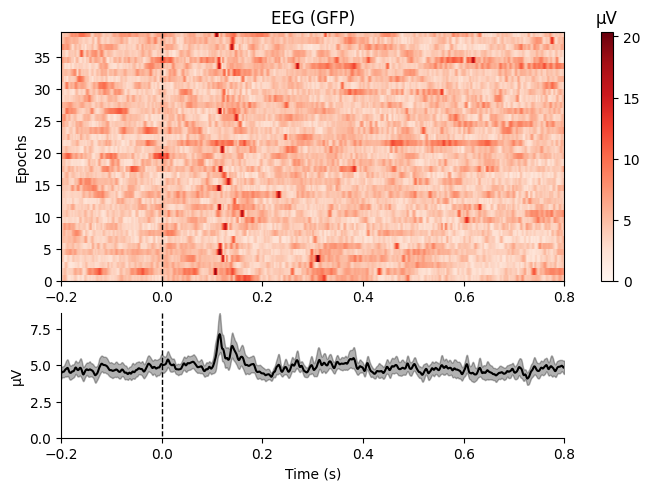

[<Figure size 640x480 with 3 Axes>]

In [ ]:
epochs[(epochs.metadata["category"] == "place")].plot_image()

Hmm al parecer, en ambos gráficos, hay un potencial de evento cerca de los 200 ms, el cual es positivo. Pero ¿Cómo podríamos ahondar más en los datos?
<br><br>
Para esto tenemos la solución de crear objetos [Evoked](https://mne.tools/stable/generated/mne.Evoked.html#mne.Evoked). Estos objetos son el promedio de todas las epochs (segmentos), el cual da como resultado un solo segmento con toda la data. Anteriormente estábamos viendo también la data combinada, pero trabajar con objetos evoked nos dará más opciones para explorarla.
<br><br>
Intentemos seguir en la misma línea de análisis de seleccionar las epochs en donde el participante, según los metadatos, vio una imagen de un lugar.

In [ ]:
evoked = epochs[(epochs.metadata["category"] == "place")].average()

No projector specified for this dataset. Please consider the method self.add_proj.


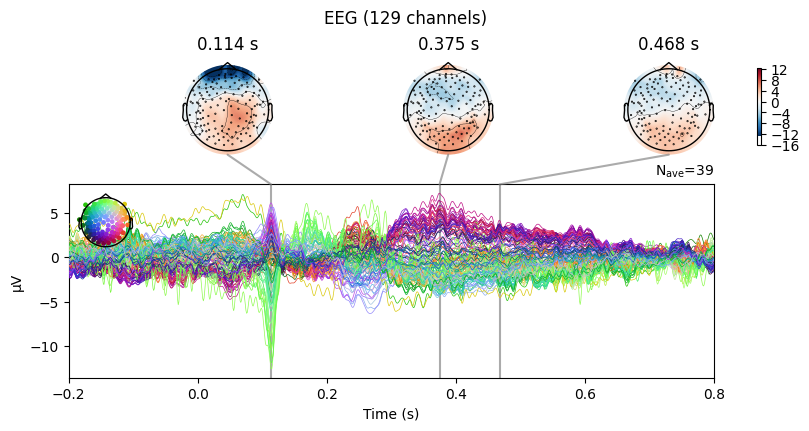

In [ ]:
evoked_jointplot = evoked.plot_joint()

¡Vaya! ¡Ahora los gráficos han cambiado! ¿Cómo se deben de leer?
<br><br>
Bueno, siempre podemos ayudarnos de las descripciones de los ejes X e Y (•̀ᴗ•́)ง
<br><br>
En este caso, tenemos en el eje X el tiempo del objeto evoked (que, como hay que recordar, son las epochs promediadas), mientras en el eje Y se encuentra la amplitud o voltaje (microvoltios). Básicamente estamos viendo cómo cambia la señal a través del tiempo.
<br><br>
Sin embargo ¿Por qué se ven tantas señales y no solo una? ( •́ ⍨ •̀)
<br><br>
Bueno, eso es porque cada señal es un electrodo y, como hemos mencionado antes, ¡Tenemos más de 100 electrodos! Por eso hay tantas rayas en el gráfico.
<br><br>
Luego, podemos ver las tres figuras de cabeza encima del gráfico. Estas tres figuras parten de una línea específica en el tiempo, lo cual nos indica que nos están mostrando instantes específicos. De hecho, sobre ellas, se puede observar el milisegundo exacto que nos señalan. Adicionalmente, tenemos un código de color en esas tres cabezas que se guía de la leyenda de la derecha: cuando vemos electrodos en azul en esas cabezas, significan que están teniendo potenciales (voltajes/amplitudes) negativos, mientras que cuando son más cercanos al rojo, se acercan a potenciales positivos (voltajes/amplitudes).
<br><br>

눈_눈 Entonces... ¡Al parecer es demasiada información! (ノಠ益ಠ)ノ彡┻━┻

Sin embargo, si nos concentramos sólo en los tiempos que nos han salido señalados, podríamos inferir que tenemos tres potenciales de acción, aunque la polaridad de estos varía dependiendo de cuáles son los electrodos.
<br><br>

Afortunadamente, podemos también especificar, en un objeto evoked, qué electrodos queremos escoger para el análisis visual. Intentemos escoger los electrodos occipitales para analizar el potencial de accción que se encuentra cerca de 400 ms.
<br><br>

Para esto, primero tenemos que saber qué nombres tienen nuestros electrodos occipitales. Estos dependerán del montaje que se esté utilizando para colocar los electroso (en otras palabras, de la convención que se esté utilizando). Hay distintos montajes dependiendo del número de electrodos, los cuales pueden ser revisados [aquí](https://en.wikipedia.org/wiki/10%E2%80%9320_system_(EEG)).
<br><br>
Si se quiere saber la organización de electrodos en esta base de datos, primero hay que obtener el montaje que se está utilizando, lo cual es bastante directo con el siguiente método.


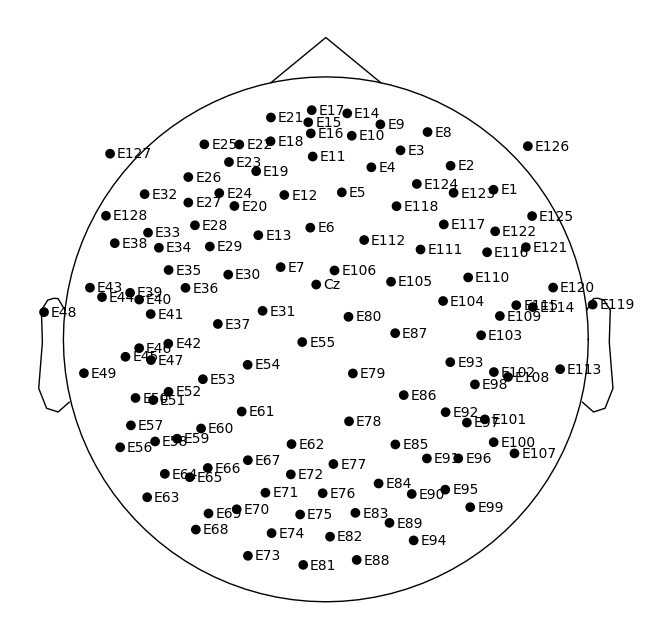

In [ ]:
montage = raw.get_montage()
montage_figura = montage.plot()

Ahora, generamos el mismo gráfico pero con el parámetro "picks".

No projector specified for this dataset. Please consider the method self.add_proj.


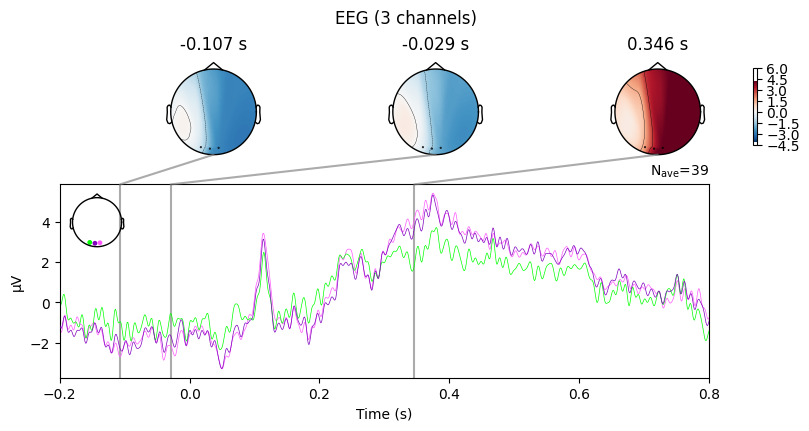

In [ ]:
evoked_joint_selection = evoked.plot_joint(picks=["E81", "E88", "E73"])

¡Interesante! Parece que la señal va subiendo progresivamente a partir de los 200 ms, hasta llegar a su punto más alto aproximadamente en 400 ms. Sin embargo, hay un *spike* bastante notorio antes de los 200 ms. De hecho, este potencial es particularmente puntual, lo cual puede ser indicador de que es una respuesta bastante específica relacionada al evento (imagen de lugar). Por ejemplo, un potencial relacionado a un evento se vería así:

<div style="border: 2px solid #ddd; padding: 10px; background-color: #f9f9f9; border-radius: 5px;">
  <img src="https://www.researchgate.net/profile/Patrick-Ledwidge/publication/326606501/figure/fig1/AS:652287580053505@1532528886461/N400-and-P600-Components-of-the-ERP_W640.jpg" width="400">
</div>


<br><br>
Podemos tambien intentar encontrar le tiempo exacto del potencial del evento al dibujar una línea en el intervalo que se quiere examinar con `.plot_joint()` o si no, sombrear un intervalo con `.plot()`. Intentemos cambiar el foco de nuestra atención de los 400ms a un tiempo entre 100 y 150 ms.

No projector specified for this dataset. Please consider the method self.add_proj.


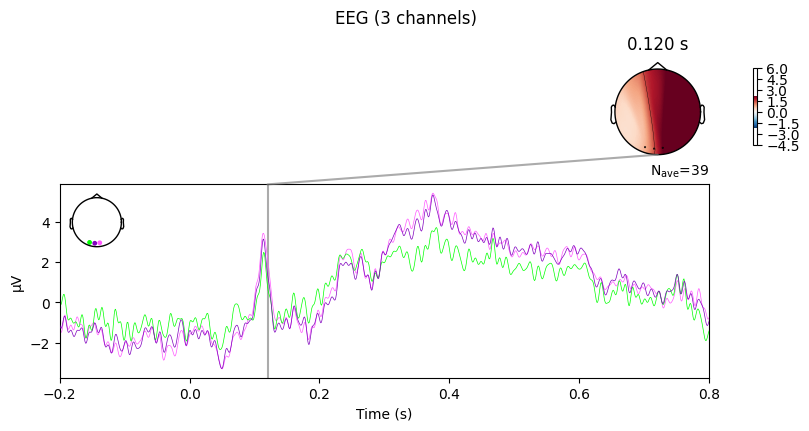

In [ ]:
evoked_plot120 = evoked.plot_joint(picks=["E81", "E88", "E73"], times=0.120)

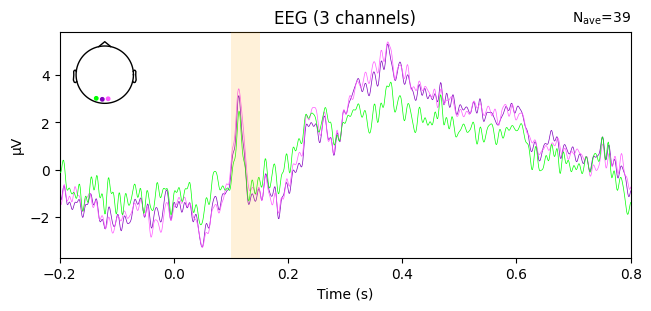

In [ ]:
evoked_highlight = evoked.plot(picks=["E81", "E88", "E73"], highlight=[0.100, 0.150])

¡Parece que la estimación entre 100ms y 150ms era correcta! (ﾉ^_^)ﾉ✧

Un próximo paso sería encontrar el valor numérico de la amplitud de interés (microvoltios) y el tiempo exacto en el que se da. En este caso, podemos utilizar el método `.get_peak` de los objetos evoked. Este método nos devuelve el valor más alto (o más bajo) en un tiempo de interés, lo cual podría servir para encontrar ese potencial de acción.

Pero antes de utilizar esa función, es recomendable crear una nueva variable en las cual solo escojamos los electrodos de interés; hasta ahora, si bien los hemos escogido, han sido dentro de parámetros de la función `.plot()` o `.plot_joint()`, pero necesitaremos escogerlos antes de aplicar `.get_peak`.



In [ ]:
evoked_electrodos = evoked.copy().pick(
    ["E81", "E88", "E73"]
)  # Antes de seleccionar los electrodos, se crea una copia del objeto evoked para no modificar la anterior.

In [ ]:
evoked_electrodos.get_peak(
    tmin=0.100,  # Se seleccciona un intervalo de tiempo de interés.
    tmax=0.150,
    return_amplitude=True,  # Utilizamos este parámetro para indicar que el método debe de darnos la amplitud además del tiempo en donde ocurre.
    mode="pos",  # Sólo considera los peaks de carga positiva.
)

('E88', 0.114, 3.423778768550872e-06)

¡Bien! Parece que el tiempo exacto del peak de aquel potencial es 115 ms, al menos para el electrodo E88. Si queremos ver el peak en cada electrodo en específico, deberíamos escogerlos uno por uno.

En este caso, si revisamos la literatura, el potencial de acción positivo alrededor de los 100ms (P100) en electrodos occipitales, se relaciona con la activación de la corteza visual ante estímulos visuales. Esto tiene lógica considerando que el evento es mostrar una imagen ¿Verdad?

# Frecuencias de onda

Hemos hablado anteriormente de las frecuencias de onda y cómo se pueden utilizar estas para descomponer una señal de EEG. Dentro de los objetos epoch y evoked, también tenemos métodos para explorar qué frecuencias son las que componen sus señales y ver las que predominan.


El método `.compute_psd` aplicado a [epochs](https://mne.tools/dev/generated/mne.Epochs.html#mne.Epochs.compute_psd) o [evokeds](https://mne.tools/dev/generated/mne.Evoked.html#mne.Evoked.compute_psd) crea un nuevo objeto llamado [Spectrum](https://mne.tools/dev/generated/mne.time_frequency.Spectrum.html#mne.time_frequency.Spectrum). Este nuevo objeto contiene la información de las frecuencias de onda y, como los objetos anteriores que hemos examinado, también tiene métodos que nos permitirán explorarlo.

Es importante señalar que `.compute_psd` proviene de Power Spectral Density. Es decir, se encarga de ver cuántos microvoltios al cuadrado µV² (potencia/power) hay por cada frecuencia (Hz). Por eso veremos que las unidades son (µV²/Hz).

¿Suena muy confuso? ¡No importa! De momento, lo importante es tener en cuenta que seguimos hablando de microvoltios (µV) es decir, de actividad eléctrica. (⚡^⚡)⊃))


    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


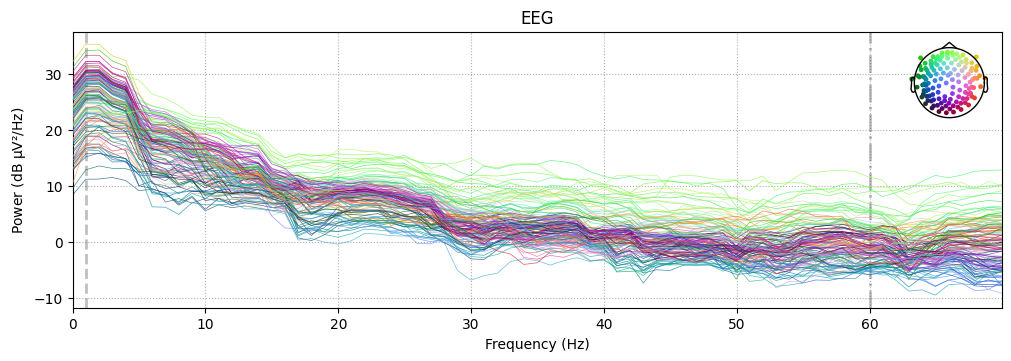

In [ ]:
spectrum = evoked.compute_psd(fmax=70)
spectrum_plot = (
    spectrum.plot()
)  # este gráfico nos dará la densidad de la potencia de cada frecuencia

Hmm... en este caso parece que la potencia en las ondas bajas son las predominantes, al menos en un análisis de todos los electrodos. Adicionalmente a ello, podemos realizar un examen más exhaustivo, ya que MNE nos permite generar gráficos en los cuales ver las frecuencias de onda más comúnmente relacionadas con estímulos cognitivos.

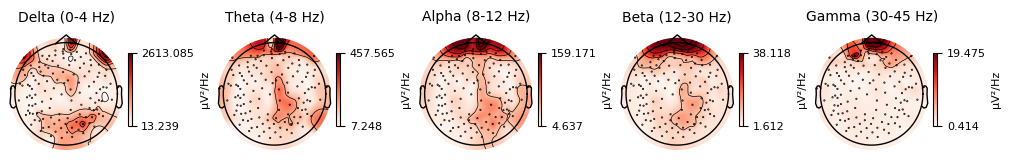

In [ ]:
spectrum_topomap = spectrum.plot_topomap()

Esto se ve un poco más informativo. Podemos ver que las ondas Alpha, Delta y Theta son las predominantes.

Hmm... ¿Pero qué significaban estas ondas (・・ ) ?

Bueno, afortunadamente tenemos material para recordarlo extraído de [este artículo](https://www.sleepfoundation.org/noise-and-sleep/binaural-beats)

<div style="border: 2px solid #ddd; padding: 10px; background-color: #f9f9f9; border-radius: 5px;">
  <img src="https://www.sleepfoundation.org/wp-content/uploads/2022/06/SF_BrainWaves_Graphic.jpg" width="700">
</div>


¡Genial! Entonces, si queremos ahondar aún más, podemos pasar la información del objeto spectrum a un dataframe (o matriz) con el método `.to_data_frame()`

In [ ]:
spectrum_dataframe = spectrum.to_data_frame()
spectrum_dataframe

freq            E1            E2            E3            E4  \
0    0.000000  2.706571e-10  1.069885e-10  8.653958e-11  6.854424e-11   
1    0.999001  5.396020e-10  2.024961e-10  1.523389e-10  1.177771e-10   
2    1.998002  5.552642e-10  2.106352e-10  1.474182e-10  1.101377e-10   
3    2.997003  3.551956e-10  1.470499e-10  1.277905e-10  1.110389e-10   
4    3.996004  2.905856e-10  1.263882e-10  1.224702e-10  1.047439e-10   
..        ...           ...           ...           ...           ...   
66  65.934066  1.288835e-12  1.970529e-12  1.157387e-12  1.319634e-12   
67  66.933067  1.476890e-12  2.136000e-12  1.199313e-12  1.315243e-12   
68  67.932068  8.013831e-13  1.721951e-12  1.606727e-12  2.163487e-12   
69  68.931069  1.510424e-12  3.008237e-12  1.972060e-12  2.631315e-12   
70  69.930070  1.558259e-12  2.825978e-12  1.900885e-12  2.097807e-12   

              E5            E6            E7            E8            E9  ...  \
0   9.369267e-11  4.252064e-10  4.465148e-10  1.271058e-10  1.168894e-10  ...   
1   1.751616e-10  8.405209e-10  8.955397e-10  2.487827e-10  2.300927e-10  ...   
2   1.694914e-10  8.416572e-10  8.816520e-10  2.234688e-10  2.099036e-10  ...   
3   1.560349e-10  5.377965e-10  5.688431e-10  1.882548e-10  1.873746e-10  ...   
4   1.446483e-10  4.624763e-10  4.678559e-10  1.931473e-10  1.966032e-10  ...   
..           ...           ...           ...           ...           ...  ...   
66  1.243057e-12  5.370581e-13  5.058150e-13  3.312090e-12  1.065599e-11  ...   
67  1.309038e-12  6.709890e-13  5.487443e-13  3.410133e-12  1.152952e-11  ...   
68  1.297203e-12  9.166018e-13  5.013027e-13  3.006663e-12  8.947139e-12  ...   
69  1.384242e-12  8.832492e-13  3.762401e-13  3.740952e-12  1.204546e-11  ...   
70  1.418398e-12  9.294334e-13  3.176812e-13  4.030103e-12  1.000994e-11  ...   

            E120          E121          E122          E123          E124  \
0   4.903207e-11  2.622093e-10  1.664951e-10  2.025411e-10  1.480865e-10   
1   1.062294e-10  5.375071e-10  3.260339e-10  3.923869e-10  2.868879e-10   
2   1.492061e-10  5.475862e-10  3.457239e-10  4.048125e-10  2.856539e-10   
3   1.243324e-10  3.460059e-10  2.133576e-10  2.712918e-10  1.966106e-10   
4   1.301681e-10  2.992060e-10  1.765668e-10  2.123565e-10  1.693756e-10   
..           ...           ...           ...           ...           ...   
66  2.100716e-12  1.038531e-12  1.305407e-12  2.165781e-12  3.215876e-12   
67  2.228242e-12  1.197297e-12  1.432555e-12  2.107843e-12  1.997207e-12   
68  2.369773e-12  7.592292e-13  1.228874e-12  1.672121e-12  2.052348e-12   
69  2.218193e-12  8.402931e-13  1.494784e-12  2.246898e-12  1.888010e-12   
70  2.419205e-12  9.276077e-13  1.664390e-12  2.125371e-12  1.971081e-12   

            E125          E126          E127          E128            Cz  
0   2.711961e-10  1.622340e-09  1.264254e-09  5.171301e-10  3.486183e-10  
1   5.503298e-10  3.333415e-09  2.560853e-09  1.029090e-09  7.072008e-10  
2   5.644473e-10  3.320347e-09  2.629562e-09  1.074046e-09  6.793686e-10  
3   3.597675e-10  2.073818e-09  1.671148e-09  7.056123e-10  4.334621e-10  
4   3.047644e-10  1.724762e-09  1.349902e-09  5.516954e-10  3.774999e-10  
..           ...           ...           ...           ...           ...  
66  1.424259e-12  2.142287e-12  2.652445e-12  1.616375e-12  5.268166e-13  
67  1.495911e-12  2.069216e-12  2.583038e-12  1.580739e-12  2.637772e-13  
68  9.587250e-13  1.967750e-12  2.565080e-12  1.584605e-12  2.070827e-13  
69  1.196630e-12  1.759115e-12  3.057937e-12  2.062952e-12  1.429811e-13  
70  1.165718e-12  1.699984e-12  3.321198e-12  2.109190e-12  1.229649e-13  

[71 rows x 130 columns]

¡Demasiados números! o(╥﹏╥)o
<br><br>
Bueno, hay que tener en cuenta que también tenemos muchos electrodos. En esta tabla, cada columna es un electrodo, excepto la primera, que señala la frecuencia de onda de interés. El valor en cada columna de electrodos es la densidad de la potencia de dicha frecuencia, el cual es un indicador de cuán poderosa es la señal en la frecuencia.

In [ ]:
spectrum_dataframe[["E81", "E88", "E73", "freq"]]

E81           E88           E73       freq
0   5.492247e-10  5.787829e-10  2.481088e-10   0.000000
1   1.068667e-09  1.130753e-09  4.898166e-10   0.999001
2   1.079173e-09  1.138144e-09  4.901595e-10   1.998002
3   6.747333e-10  7.033298e-10  2.912964e-10   2.997003
4   5.461254e-10  5.806631e-10  2.476642e-10   3.996004
..           ...           ...           ...        ...
66  7.490661e-13  8.519987e-13  1.013592e-12  65.934066
67  7.489047e-13  9.042955e-13  9.986456e-13  66.933067
68  8.569346e-13  8.849158e-13  8.309599e-13  67.932068
69  9.401436e-13  7.952683e-13  8.685762e-13  68.931069
70  9.928794e-13  7.277623e-13  9.797472e-13  69.930070

[71 rows x 4 columns]

Lo que sucede aquí es que nuestras frecuencias no están unidas en los intervalos que corresponden a las ondas relacionadas al cerebro (alpha, beta, delta, etc). Pero para ello podemos realizar un poco de procesamiento de datos. Como es un dataframe, podemos utilizar la librería pandas para organizar nuestros datos según lo que nos interese, y finalmente obtener un gráfico con matplotlib.

<ipython-input-118-344caad3f784>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df_filtered.groupby('freq_group')[['E81', 'E88', 'E73']].sum()


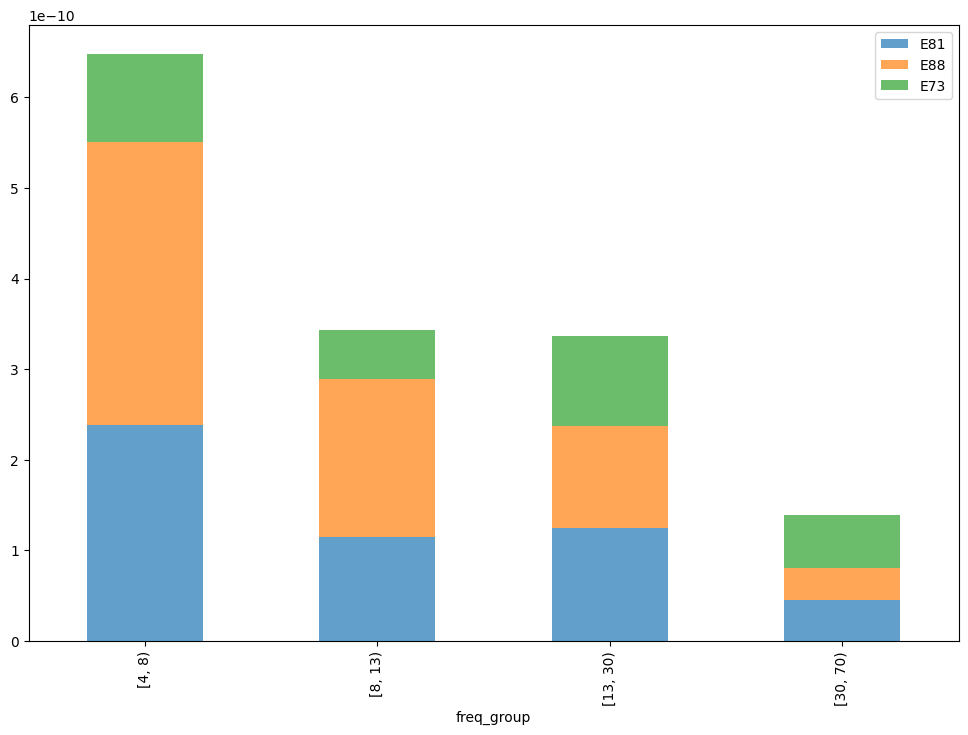

In [ ]:
df_filtered = spectrum_dataframe[
    ["E81", "E88", "E73", "freq"]
]  # seleccionamos las columnas que interesan
df_filtered = df_filtered[
    df_filtered["freq"] >= 1
]  # filtramos para que no nos den frecuencias más bajas que 1
df_filtered["freq_group"] = (
    pd.cut(  # se crea una nueva columna en el dataframe 'freq_group'
        df_filtered[
            "freq"
        ],  # se utiliza 'cut' en la columna 'freq', en vez de tener muchas frecuencias, crear intervalos que nos interesan.
        bins=[4, 8, 13, 30, 70],  # los intervalos que interesan
        right=False,  # el límite derecho del intervalo no incluye el valor final
    )
)
df_grouped = df_filtered.groupby("freq_group")[
    ["E81", "E88", "E73"]
].sum()  # agrupamos los datos segun sus valores en 'freq_group' y sumamos las potencias.
ax = df_grouped.plot(
    kind="bar", stacked=True, alpha=0.7, figsize=(12, 8)
)  # llamamos una funcion basica para graficar

plt.show()

Incluso, si queremos, podemos colocar nombres más explicativos al gráfico.

<ipython-input-127-2b9eb86c5e7c>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df_filtered.groupby('freq_group')[['E81', 'E88', 'E73']].sum()


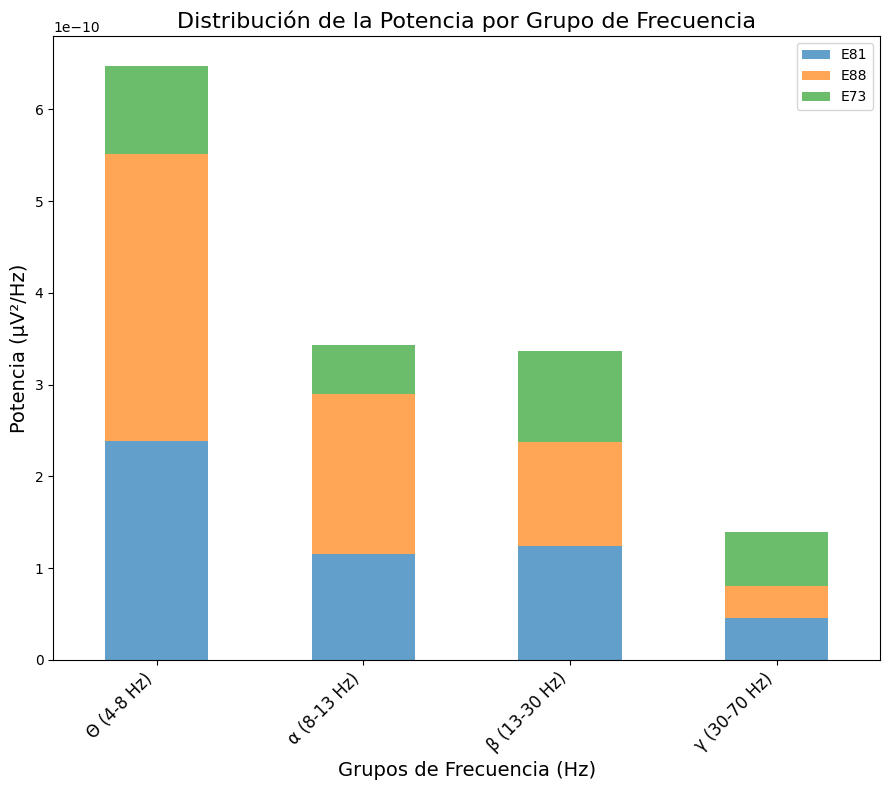

In [ ]:
df_filtered = spectrum_dataframe[["E81", "E88", "E73", "freq"]]
df_filtered = df_filtered[df_filtered["freq"] >= 1]
df_filtered["freq_group"] = pd.cut(
    df_filtered["freq"], bins=[4, 8, 13, 30, 70], right=False
)
df_grouped = df_filtered.groupby("freq_group")[["E81", "E88", "E73"]].sum()
ax = df_grouped.plot(kind="bar", stacked=True, alpha=0.7, figsize=(9, 8))

# el mismo código que anteriormente y luego agregamos personalización al gráfico

ax.set_xlabel("Grupos de Frecuencia (Hz)", fontsize=14)  # etiquetamos el eje X
ax.set_ylabel("Potencia (µV²/Hz)", fontsize=14)  # etiquetamos el eje Y
ax.set_title(
    "Distribución de la Potencia por Grupo de Frecuencia", fontsize=16
)  # titulo general
labels = [
    "Θ (4-8 Hz)",
    "α (8-13 Hz)",
    "β (13-30 Hz)",
    "γ (30-70 Hz)",
]  # creamos las labels que queremos para los valores
ax.set_xticklabels(
    labels, rotation=45, ha="right", fontsize=12
)  # asignamos las etiquetas personalizadas

plt.tight_layout()  # ajustamos el espacio para que las etiquetas no se corten
plt.show()

¡Muy bien! Esto se ve un poco más entendible. (๑•̀ㅂ•́)و✧

De hecho, para algunos análisis, lo que más interesará encontrar son las frecuencias de ondas relacionadas a procesos cognitivos, así que es bastante útil saber que se puede acceder a esa información. (へへ)✌

# Elaborado por

*   Daniel Falcón Quintana
*   Miguel Dávila Palomino
<br><br>

# Referencias:

Delorme, A. (2023). EEG is better left alone. Scientific reports, 13(1), 2372. https://doi.org/10.1038/s41598-023-27528-0

Gorgolewski, K. J., Auer, T., Calhoun, V. D., Craddock, R. C., Das, S., Duff, E. P., ... & Poldrack, R. A. (2016). The brain imaging data structure, a format for organizing and describing outputs of neuroimaging experiments. Scientific data, 3(1), 1-9. https://doi.org/10.1038/sdata.2016.44

Hoechenberger, A. (2023). openneuro-py. GitHub. https://github.com/hoechenberger/openneuro-py

Jas, M., Engemann, D., Raimondo, F., Bekhti, Y., & Gramfort, A. (2016). Automated rejection and repair of bad trials in MEG/EEG. En 6th International Workshop on Pattern Recognition in Neuroimaging (PRNI).

Jas, M., Engemann, D., Bekhti, Y., Raimondo, F., & Gramfort, A. (2017). Autoreject: Automated artifact rejection for MEG and EEG data. NeuroImage, 159, 417-429. https://doi.org/10.1016/j.neuroimage.2017.06.030

Larson, E., Gramfort, A., Engemann, D. A., Leppakangas, J., Brodbeck, C., Jas, M., Brooks, T. L., Sassenhagen, J., McCloy, D., Luessi, M., King, J.-R., Höchenberger, R., Goj, R., Favelier, G., Brunner, C., van Vliet, M., Wronkiewicz, M., Rockhill, A., Holdgraf, C., … luzpaz. (2024). MNE-Python (v1.8.0). Zenodo. https://doi.org/10.5281/zenodo.13340330

Ledwidge, P. S. (2018). The impact of sports-related concussions on the language system: a case for event-related brain potentials. Annals of Behavioral Neuroscience, 1(1), 36-46. https://www.researchgate.net/publication/326606501_The_Impact_of_Sports-Related_Concussions_on_the_Language_System_A_Case_for_Event-Related_Brain_Potentials

Li, A., Höchenberger, R., Donoghue, T., Scheltienne, M., Feitelberg, J., & Saini, A. (2022). MNE-ICALabel: Automatically annotating ICA components with ICLabel in Python. Journal of Open Source Software, 7(76), 4484. https://doi.org/10.21105/joss.04484

Pernet, C. R., Appelhoff, S., Gorgolewski, K. J., Flandin, G., Phillips, C., Delorme, A., & Oostenveld, R. (2019). EEG-BIDS, an extension to the brain imaging data structure for electroencephalography. Scientific data, 6(1), 103. https://doi.org/10.1038/s41597-019-0104-8

Pernet, C. R., Appelhoff, S., Gorgolewski, K. J., Flandin, G., Phillips, C., Delorme, A., & Oostenveld, R. (2019). EEG-BIDS, an extension to the brain imaging data structure for electroencephalography. Scientific data, 6(1), 103. https://doi.org/10.1038/s41597-019-0104-8
Puente Guillen, P. (2016). Predicting Sleepiness from Driving Behaviour (Doctoral dissertation, University of Leeds). https://etheses.whiterose.ac.uk/17938/

Sleep Foundation. (2023, octubre 25). Binaural beats and sleep. Sleep Foundation. https://www.sleepfoundation.org/noise-and-sleep/binaural-beats

Veillette, J. P., Heald, S. L. M., Wittenbrink, B., et al. (2023). Single-trial visually evoked potentials predict both individual choice and market outcomes. Scientific Reports, 13, 14340. https://doi.org/10.1038/s41598-023-41613-4

Veillette, J. and Heald, S. and Wittenbrink, B. and Nusbaum, H. (2022). eeg-neuroforecasting. OpenNeuro. [Dataset] doi: doi:10.18112/openneuro.ds004284.v1.0.0

Yarkoni et al., (2019). PyBIDS: Python tools for BIDS datasets. Journal of Open Source Software, 4(40), 1294, https://doi.org/10.21105/joss.01294

Yarkoni, Tal, Markiewicz, Christopher J., de la Vega, Alejandro, Gorgolewski, Krzysztof J., Halchenko, Yaroslav O., Salo, Taylor, … Blair, Ross. (2019, August 8). bids-standard/pybids: 0.9.3 (Version 0.9.3). Zenodo. https://doi.org/10.5281/zenodo.3363985

